In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\aitma\\Downloads\\Exrcice validation croisée\\blood_transfusion.csv")
X = df.drop(columns="Class")
Y = df["Class"]

In [2]:
X.head() 

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [3]:
Y.head()

0        donated
1        donated
2        donated
3        donated
4    not donated
Name: Class, dtype: object

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold

#création une régression logistque
modèle = make_pipeline(StandardScaler(), LogisticRegression())


# Validation croisé avec stratification
cv = StratifiedKFold(n_splits=3)
# on  Utilise explicitement le paramètre de scoring de cross_val_score
rs = cross_val_score(modèle, X, Y, cv=cv,scoring='accuracy')

print(f"L'accuracy moyenne est "
      f"{rs.mean():.3f} +/- {rs.std():.3f}")

L'accuracy moyenne est 0.750 +/- 0.030


on refait l'expérimentation en calculant balanced_accuracy

In [7]:
# on  Utilise explicitement le paramètre de scoring de cross_val_score 'balanced_accuracy'
rs = cross_val_score(modèle, X, Y, cv=cv,scoring='balanced_accuracy')

print(f"L'accuracy moyenne est "
      f"{rs.mean():.3f} +/- {rs.std():.3f}")

L'accuracy moyenne est 0.597 +/- 0.088


alors l'accuracy c'est le nombre des predictions correctes sur le nombre de toutes les observations
mais balanced_accuracy est  la somme des nombres des predictions correctes par chaque classe multiplié par l"inverse de nombre de classe  

dans notre dataset est : 1/2*((correcte donated prediction / nb of donated )+(correcte undonated prediction / nb of undonated prediction))

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
try:
    scores = cross_val_score(model, X, Y, cv=10, scoring="precision")
except ValueError as exc:
    print(exc)

C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\metrics\_scorer.py", line 88, in __call__
    *args, **kwargs)
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\metrics\_classification.py", line 1662, in precision_score
    zero_division=zero_division

C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\metrics\_scorer.py", line 88, in __call__
    *args, **kwargs)
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\metrics\_classification.py", line 1662, in precision_score
    zero_division=zero_division

In [24]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
scorer=make_scorer(precision_score,pos_labels="donated")
print(scorer)

make_scorer(precision_score, pos_labels=donated)


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

scores = cross_val_score(model, X, Y, cv=10, scoring=scorer)
print(scores)


C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\metrics\_scorer.py", line 88, in __call__
    *args, **kwargs)
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
TypeError: precision_score() got an unexpected keyword argument 'pos_labels'

  UserWarning,
C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\model

[nan nan nan nan nan nan nan nan nan nan]


C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\metrics\_scorer.py", line 88, in __call__
    *args, **kwargs)
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
TypeError: precision_score() got an unexpected keyword argument 'pos_labels'

  UserWarning,
C:\Users\aitma\anaconda3\envs\env_etl\lib\site-packages\sklearn\model

In [26]:
from sklearn.model_selection import cross_validate
scoring = ["accuracy", "balanced_accuracy"]

scores = cross_validate(model, X, Y, cv=10, scoring=scoring)
scores

{'fit_time': array([0.03399682, 0.0260005 , 0.02099967, 0.0179863 , 0.02400279,
        0.02001905, 0.02369142, 0.0199995 , 0.02198577, 0.02497768]),
 'score_time': array([0.00799584, 0.00401664, 0.00300002, 0.00399876, 0.00400066,
        0.00299954, 0.00401354, 0.00399971, 0.00401402, 0.00402212]),
 'test_accuracy': array([0.77333333, 0.78666667, 0.76      , 0.76      , 0.74666667,
        0.76      , 0.77333333, 0.78666667, 0.77027027, 0.77027027]),
 'test_balanced_accuracy': array([0.8128655 , 0.55555556, 0.5       , 0.5       , 0.49122807,
        0.5       , 0.66081871, 0.55555556, 0.5       , 0.5       ])}

In [27]:
metrics = pd.DataFrame(
    [scores["test_accuracy"], scores["test_balanced_accuracy"]],
    index=["Accuracy", "Balanced accuracy"]
).T

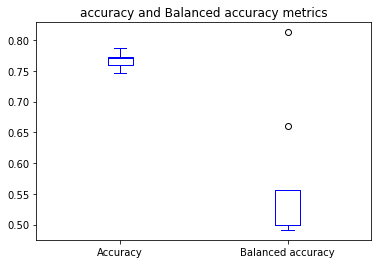

In [28]:
import matplotlib.pyplot as plt

metrics.plot.box(color='blue')
_ = plt.title("accuracy and Balanced accuracy metrics")